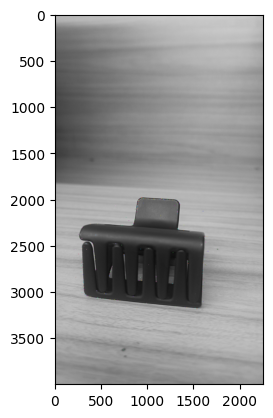

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#reading image
img1 = cv2.imread('/content/1709200300596.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

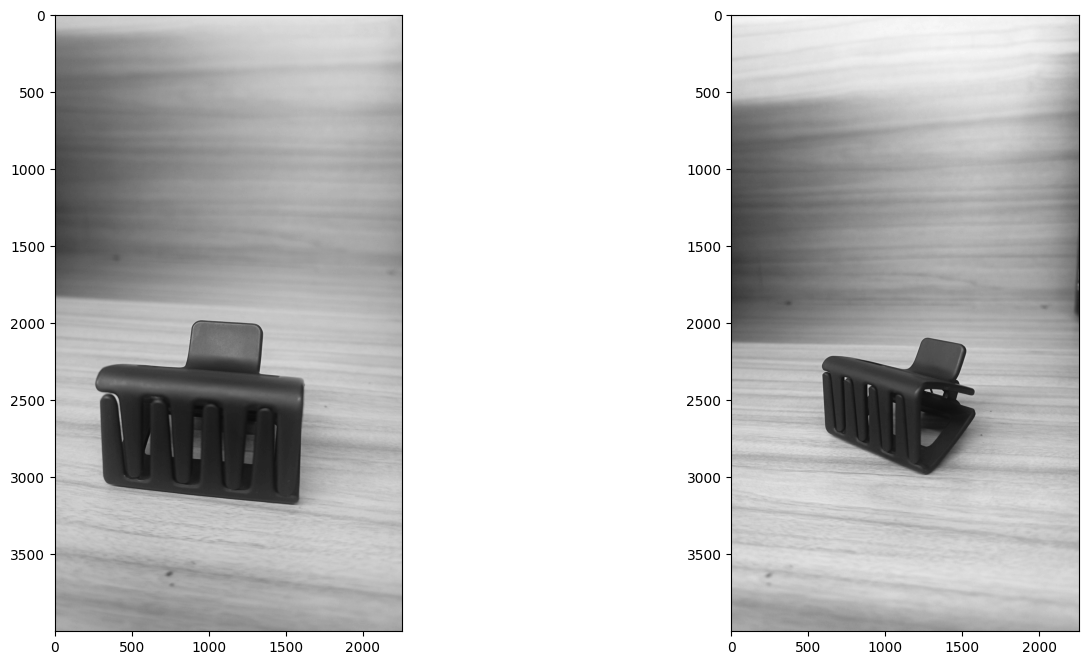

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('/content/1709200300596.jpg')
img2 = cv2.imread('/content/1709200300564.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

In [ ]:
print(img1.shape)
print(img2.shape)

(4000, 2256)
(4000, 2256)


In [ ]:
print(img1.dtype)
print(img2.dtype)

uint8
uint8


In [ ]:
if len(img1.shape) > 2 and len(img2.shape) > 2:
    print(img1.shape[2])
    print(img2.shape[2])
else:
    print("Images do not have a third dimension.")

Images do not have a third dimension.


In [ ]:
#sift
sift = cv2.xfeatures2d.SIFT_create()

In [ ]:
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

len(keypoints_1), len(keypoints_2)

(310, 327)

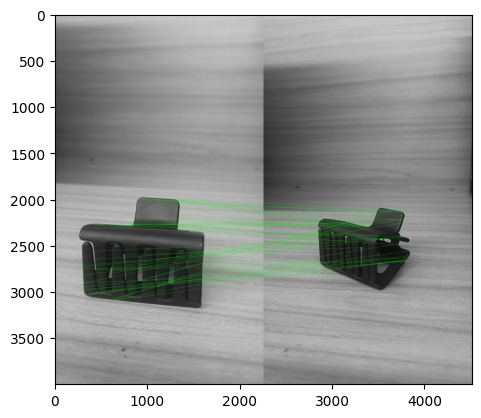

(<matplotlib.image.AxesImage at 0x7cb6098485e0>, None)

In [ ]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2,matchColor=(0, 255, 0))
plt.imshow(img3),plt.show()

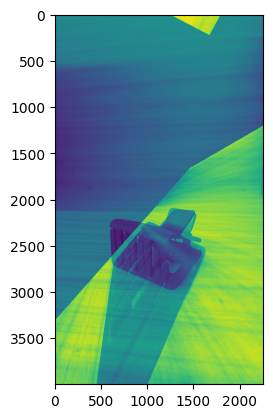

In [ ]:
# prompt: apply perspective transformation and align both the images

import matplotlib.pyplot as plt
import cv2
import numpy as np


# Get the keypoints and descriptors for both images
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

# Match the features between the two images
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1, descriptors_2)
matches = sorted(matches, key=lambda x: x.distance)

# Get the source and destination points for the perspective transformation
src_points = np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_points = np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Calculate the homography matrix
H, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

# Apply the perspective transformation to the first image
img1_transformed = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))

# Blend the two images together
img_blended = cv2.addWeighted(img1_transformed, 0.5, img2, 0.5, 0)

# Display the blended image
plt.imshow(img_blended)
plt.show()
